 
   # A brief introduction to ML Fairness

 
   # A brief introduction to ML Fairness
   
   - On the boundary between social sciences/law/computer science/statistics
   - Finding potential sources of bias
   - Finding ways to evaluate discriminative effects
   - Finding ways to remedy them

### Why shoud we care?


<center>
<img src="img/fairness_plot.svg">
</center>

##### Amazon Automated Hiring


<center>
<img src="img/amazon_hiring.png">
</center>

##### Google Photos


<center>
<img src="img/google_photos.png">
</center>

##### Amazon Card Lending
<center>
<img src="img/apple_card_gender_discrimination.png">
</center>

##### Amazon Facial Recognition
<center>
<img src="img/amazon_facial_recognition.png">
</center>

### How do we measure fairness?


Statistical parity, Group fairness, Demographic parity

Dwork et al. (2011)  

Conditional statistical parity

Corbett-Davies et al. (2017)

Darlington criterion

Darlington (1971)

Equal opportunity

Hardt, Price, Srebro (2016)

Equalized odds

Hardt, Price, Srebro (2016)

Conditional procedure accuracy

Berk et al. (2017)

Avoiding disparate mistreatment

Zafar et al. (2017)        

Balance for the negative class

Kleinberg, Mullainathan, Raghavan (2016)

Balance for the positive class

Kleinberg, Mullainathan, Raghavan (2016)

Predictive equality

Chouldechova (2016)

Equalized correlations

Woodworth (2017)

Equalized correlations

Woodworth (2017)

Cleary model

Cleary (1966)

Conditional use accuracy

Berk et al. (2017)

Predictive parity

Chouldechova (2016)

Calibration within groups

Chouldechova (2016)

### Metric Unification Framework


##### General Setting
- $X$, non sensitive attributes of (most of the time) an individual
<br />
<br />
- $A$, sensitive attribute of an individual
<br />
<br />
- $Y$, target variable
<br />
<br />
- $f\left(x, a, \boldsymbol{\theta}\right)$, estimated classifier 
<br />
<br />
- $\hat{\textit{Y }}$ prediction
<br />
<br />
- Joint Distribution $(X,A,\hat{\textit{Y }})$

##### Unified Non-discrimination Criteria  
- Independence
<br />
<br />
- Separation
<br />
<br />
- Sufficiency

##### Independence  
**Definition**: We say that the classifier satisfies independence if $\hat{\textit{Y }} \perp A$.
<br />
<br />
<br />
- demographic parity, statistical parity, group fairness, disparate impact...
- In the case of binary classification and the sensitive attribute $A \in \{a,b\}$ the criteria simplifies to 
<br />
<br />
$$\quad \quad \quad \quad \quad \quad \quad  \mathbb{P}[\hat{\textit{Y }} = 1|A = a] = \mathbb{P}[\hat{\textit{Y }} = 1|A = b]$$

##### Separation  
**Definition**: We say that the classifier satisfies Separation if $\hat{\textit{Y }} \perp A | Y$.
<br />
<br />
<br />
- In the case of binary classification and the sensitive attribute $A \in \{a,b\}$ the criteria simplifies to 
<br />
<br />
$$
\begin{align}
\quad \quad \quad \quad \quad \quad \quad  \mathbb{P}[\hat{\textit{Y }} = 1|Y = 1,A = a] = \mathbb{P}[\hat{\textit{Y }} = 1|Y = 1, A = b] \\
\quad \quad \quad \quad \quad \quad \quad  \mathbb{P}[\hat{\textit{Y }} = 1|Y = 0,A = a] = \mathbb{P}[\hat{\textit{Y }} = 1|Y = 0, A = b]
\end{align}
$$

##### Sufficiency  
**Definition**: We say that the classifier satisfies Separation if $Y \perp A | \hat{\textit{Y }}$.
<br />
<br />
<br />
- In the case of binary classification and the sensitive attribute $A \in \{a,b\}$ the criteria simplifies to 
<br />
<br />
$$
\begin{align}
\quad \quad \quad \quad \quad \quad \quad  \mathbb{P}[Y = 1|\hat{\textit{Y }} = 1,A = a] = \mathbb{P}[Y = 1|\hat{\textit{Y }} = 1, A = b] 
\end{align}
$$
<br />
<br />
- Closely connected to the notion of *calibration*. If a classifier is well calibrated with respect to the sensitive attribute it also satisfies sufficiency. Proof can be found in the paper [On Fairness and Calibration](https://papers.nips.cc/paper/7151-on-fairness-and-calibration.pdf) 


##### Why we can't have everything  
Assume that $A$ and $Y$ are not independent. Additionally assume that $\hat{\textit{Y }}$ is not independent of $Y$. Then,
- Sufficiency and independence cannot both hold.
<br />
<br />
- Independence and separation cannot both 
hold.
<br />
<br />
- Separation and sufficiency cannot both hold.

##### Why even bother?
- Can't we just remove the sensitive attribute from the model?
<br />
<br />
- We can, but it does not solve the problem if the sensitive attributed can be predicted from other features
<br />
<br />
- In general it does not solve the problem and can be actively harmful

##### Case Study Compas 
- Compas (Correctional Offender Management Profiling for Alternative Sanctions)
- MNIST of ML fairness
- Commercial algorithm used by judges and parole officers 
- Scoring criminal defendant’s likelihood of reoffending (recidivism)
- Binary classification task 
- Sensitive attribute is *race* 
- Target is recidivism, i.e. predictig $1$ is bad for the given individual
- Using [FairLearn](https://fairlearn.github.io/) & Scikit-Learn

###### Unaware Classifier

In [1]:
from tempeh.configurations import datasets
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
import pandas as pd
from fairlearn.widget import FairlearnDashboard

compas_dataset = datasets["compas"]()
x_train, x_test = compas_dataset.get_X(format=pd.DataFrame)
y_train, y_test = compas_dataset.get_y(format=pd.Series)
(
    sensitive_features_train,
    sensitive_features_test,
) = compas_dataset.get_sensitive_features("race", format=pd.Series)

In [2]:
unawareness_estimator = LogisticRegression(max_iter = 10000, penalty="none")
unawareness_estimator.fit(x_train, y_train)
y_pred_unaware = unawareness_estimator.predict(x_test)


In [3]:
FairlearnDashboard(
    sensitive_features=sensitive_features_test,
    sensitive_feature_names=['Race'],
    y_true=y_test,
    y_pred=y_pred_unaware
);

FairlearnWidget(value={'true_y': [1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1…

###### Aware Classifier

In [4]:
x_train_with_race = pd.concat([x_train, sensitive_features_train], axis=1)
x_test_with_race = pd.concat([x_test, sensitive_features_test], axis=1)

preprocessor = ColumnTransformer(
    transformers=[("encoder", OneHotEncoder(drop="if_binary"), ["race"])],
    remainder="passthrough"
)

aware_estimator = Pipeline(
    steps=[
        ("preprocessor",preprocessor),
        ("classifier", LogisticRegression(max_iter = 10000, penalty="none")),
    ]
)
aware_estimator.fit(x_train_with_race, y_train)

y_pred_aware = aware_estimator.predict(x_test_with_race)

In [5]:
FairlearnDashboard(
    sensitive_features=sensitive_features_test,
    sensitive_feature_names=['Race'],
    y_true=y_test,
    y_pred=y_pred_aware
);

FairlearnWidget(value={'true_y': [1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1…

##### How do we make a model fair?
1. Pre-processing 
    - Adjusting the features such that they are uncorrelated with the sensitive attribute (classifier will satisfy independence)
    - Model agnostic
2. In-processing 
    - At training time we enforce additional constraints
    - Model specific
3. Post-processing
    - Adjusting thresholds for different groups within the sensitive attributes
    - Model agnostic

###### Achieving Independence (Demographic Parity) with in-processing

In [6]:
from fairlearn.reductions import ExponentiatedGradient
from fairlearn.reductions import DemographicParity,EqualizedOdds

independence_classifier = ExponentiatedGradient(
    estimator=LogisticRegression(max_iter=10000, penalty="none"),
    constraints=DemographicParity(),
)

independence_estimator = Pipeline(
    steps=[
        ("preprocessor",preprocessor),
        ("classifier", independence_classifier),
    ]
)
independence_estimator.fit(
    X = x_train_with_race,
    y = y_train,
    classifier__sensitive_features = sensitive_features_train
)

y_pred_independent = independence_estimator.predict(x_test_with_race)

In [7]:
FairlearnDashboard(
    sensitive_features=sensitive_features_test,
    sensitive_feature_names=["Race"],
    y_true=y_test,
    y_pred=y_pred_independent,
);

FairlearnWidget(value={'true_y': [1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1…

###### Achieving Separation (Equalized Odds) with in-processing

In [8]:
separation_classifier = ExponentiatedGradient(
    estimator=LogisticRegression(max_iter=1000000, penalty="none"),
    constraints=EqualizedOdds(ratio = 0.8),
    T=5
)

separation_estimator = Pipeline(
    steps=[
        ("preprocessor",preprocessor),
        ("classifier", separation_classifier),
    ]
)
separation_estimator.fit(
    X = x_train_with_race,
    y = y_train,
    classifier__sensitive_features = sensitive_features_train
)

y_pred_separated = separation_estimator.predict(x_test_with_race)

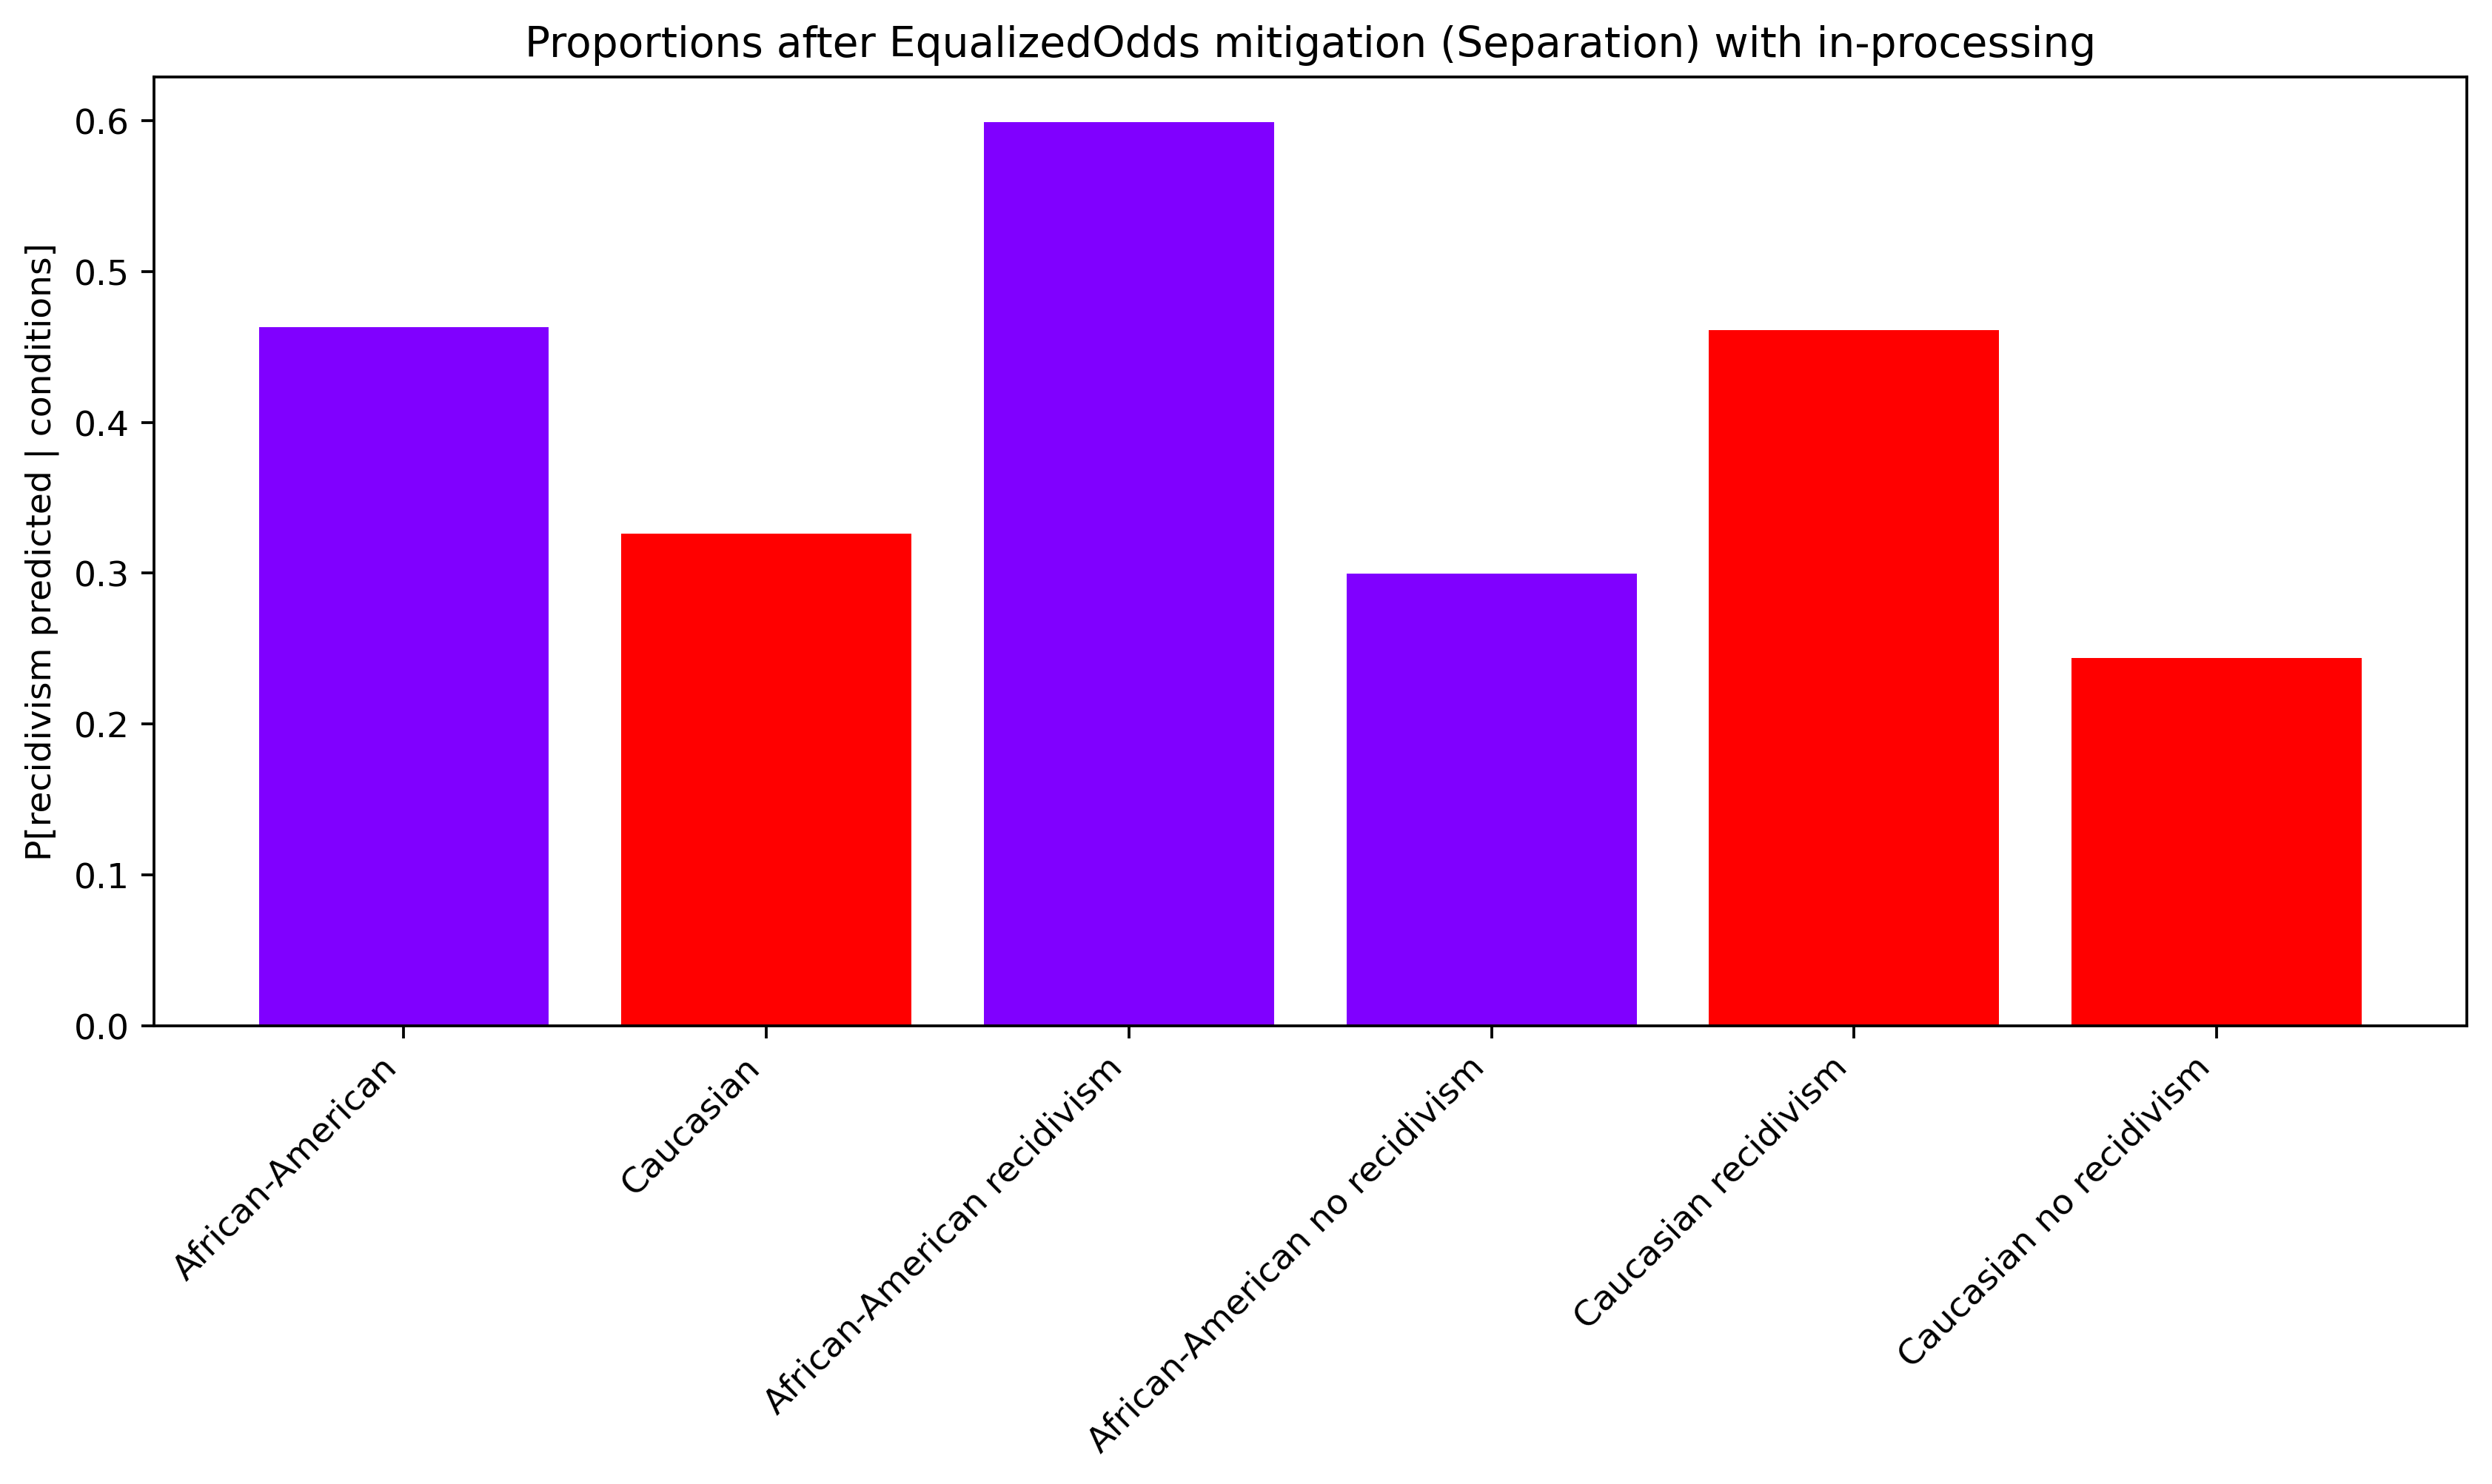

In [9]:
from utils import show_proportions
show_proportions(
    x_test_with_race,
    sensitive_features_test,
    y_pred_separated,
    y_test,
    description="Proportions after EqualizedOdds mitigation (Separation) with in-processing",
    plot_row_index=2,
)

###### Achieving Separation (Equalized Odds) with post-processing

In [10]:
from utils import process_for_threshold_optimizer,LogisticRegressionAsRegression
x_train_for_post_processing = process_for_threshold_optimizer(
    x_train = x_train_with_race,
    sensitive_attribute="race",
    sensitive_attribute_value="Caucasian"
)
x_test_for_post_processing = process_for_threshold_optimizer(
    x_train = x_test_with_race,
    sensitive_attribute="race",
    sensitive_attribute_value="Caucasian"
)

In [11]:
from fairlearn.postprocessing import ThresholdOptimizer
estimator_wrapper = LogisticRegressionAsRegression(LogisticRegression(max_iter = 10000))
estimator_wrapper.fit(x_train_for_post_processing, y_train)

postprocessed_predictor_EO = ThresholdOptimizer(
    estimator=estimator_wrapper, constraints="equalized_odds", prefit=False
)

postprocessed_predictor_EO.fit(
    x_train_for_post_processing, y_train, sensitive_features=sensitive_features_train
)

fairness_aware_predictions_EO_test = postprocessed_predictor_EO.predict(
    x_test_for_post_processing, sensitive_features=sensitive_features_test
)

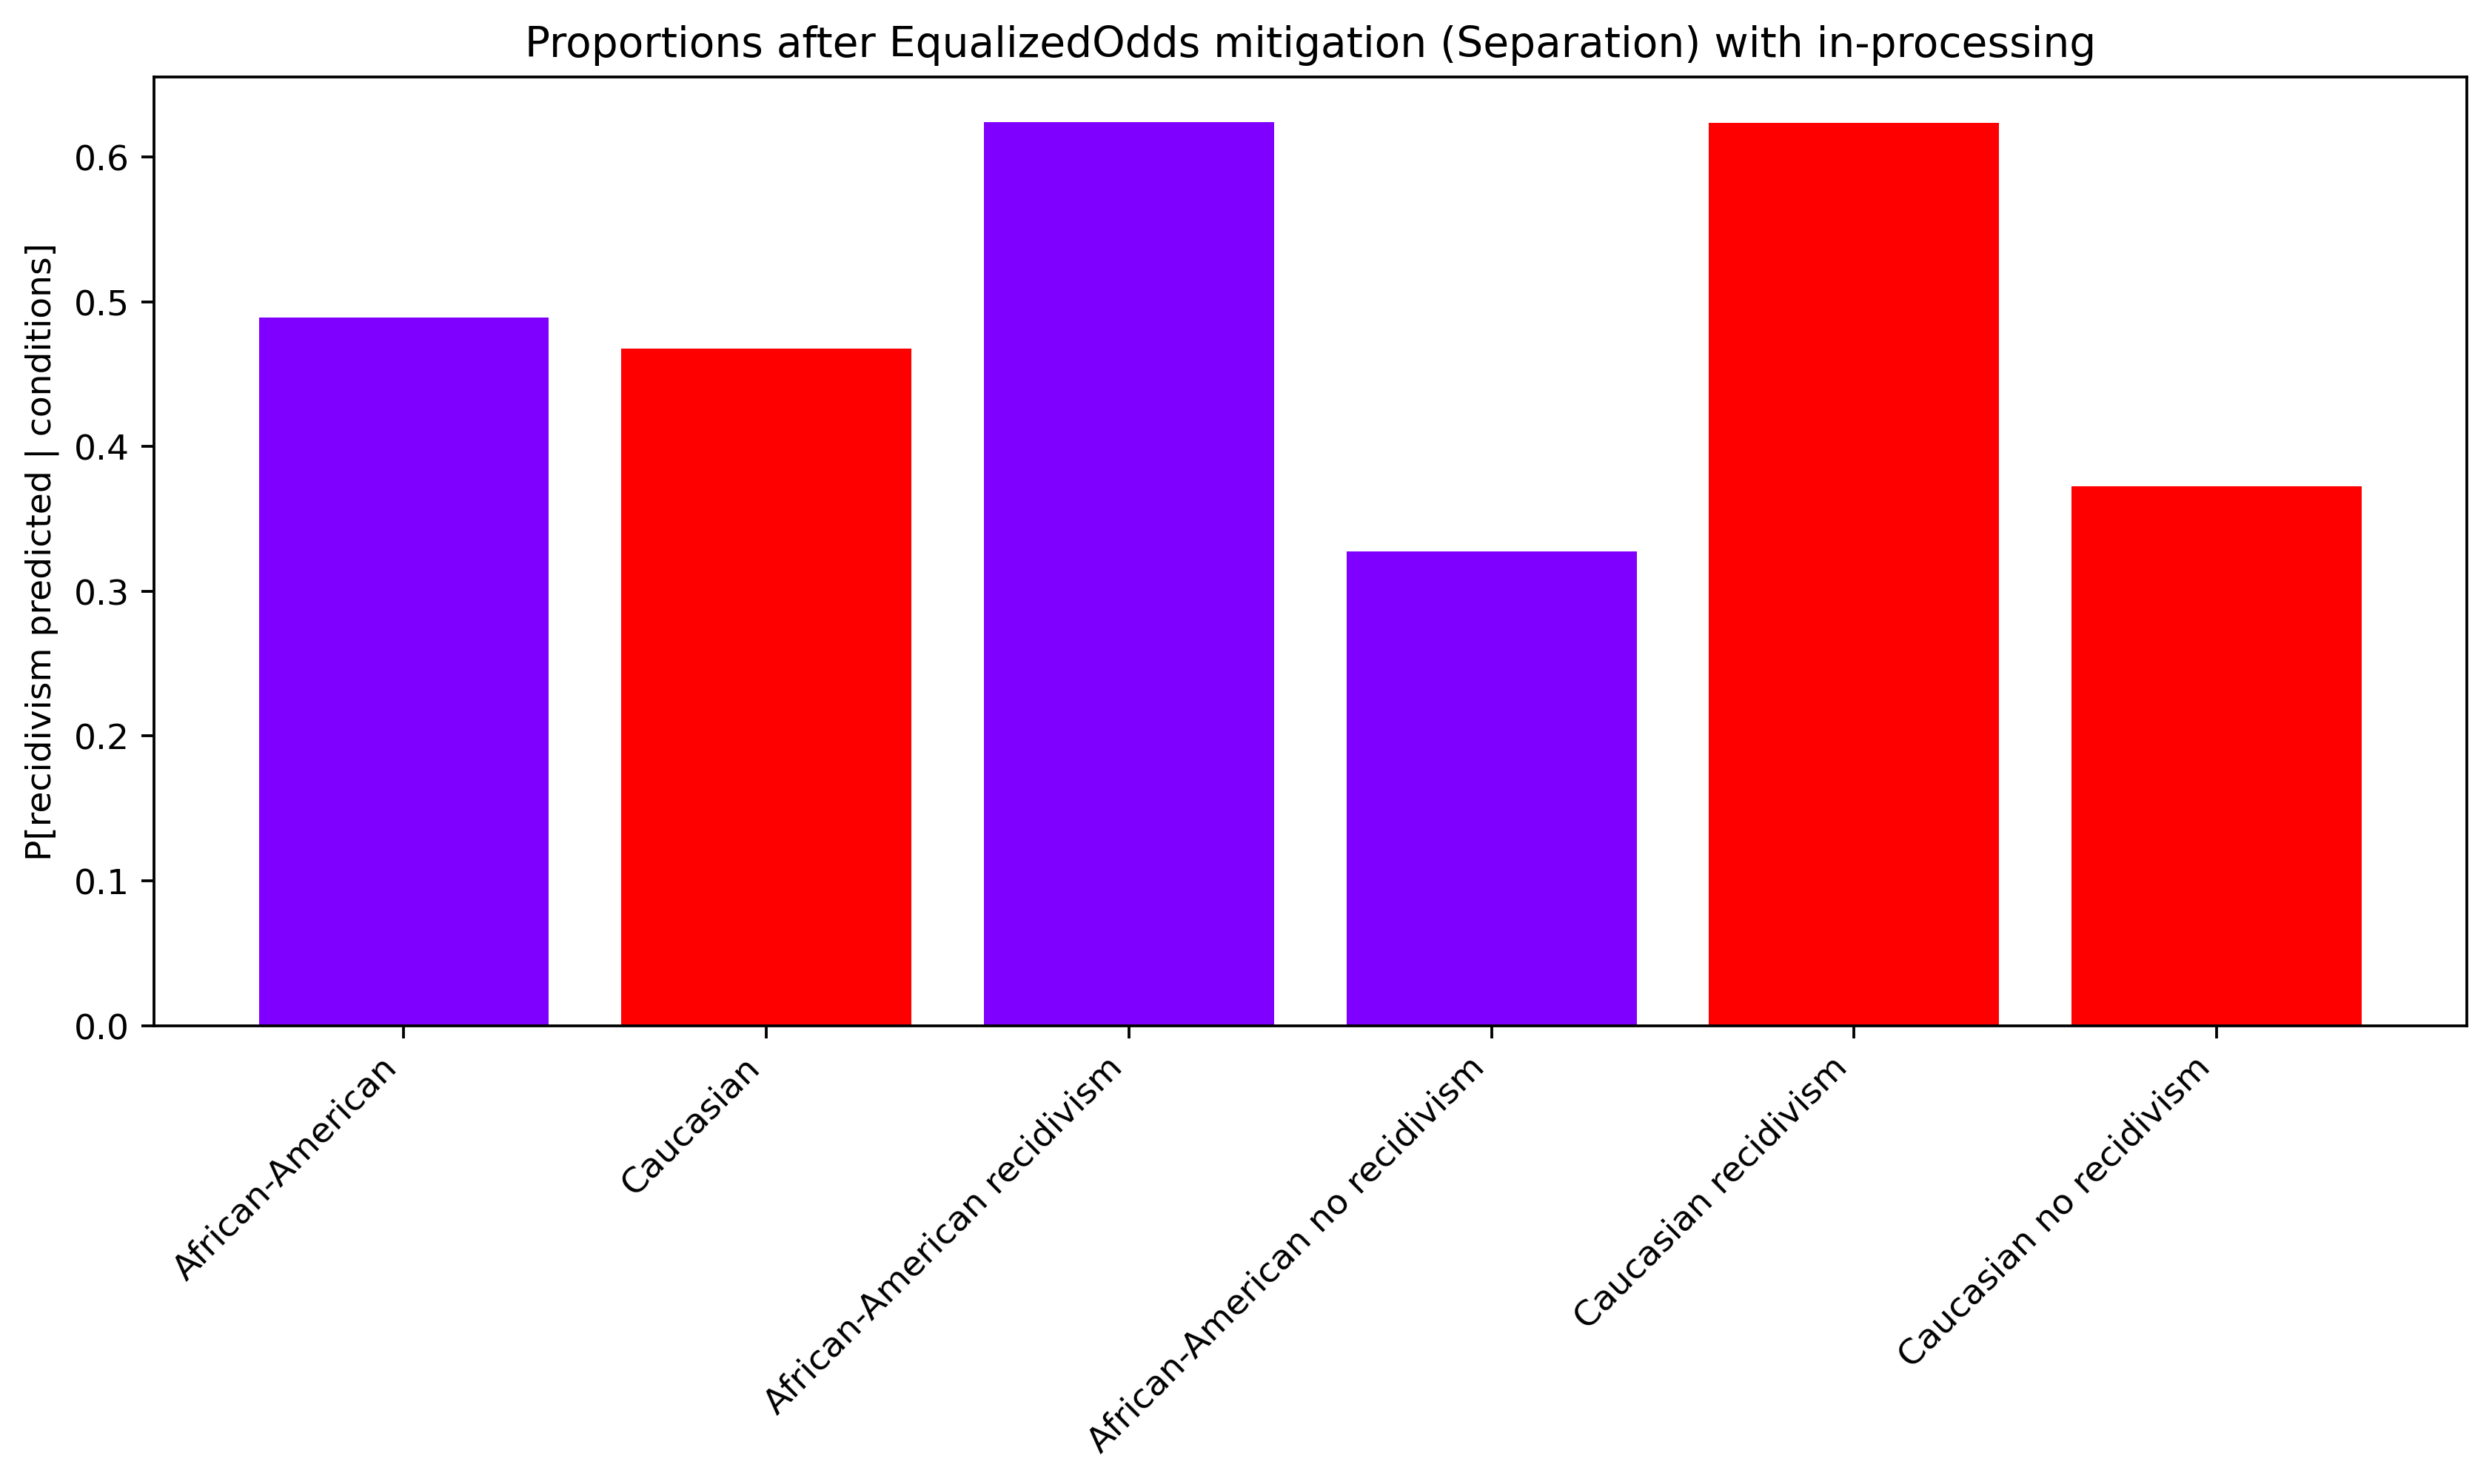

In [12]:
show_proportions(
    x_test_with_race,
    sensitive_features_test,
    fairness_aware_predictions_EO_test,
    y_test,
    description="Proportions after EqualizedOdds mitigation (Separation) with in-processing",
    plot_row_index=2,
)

##### The price of fairness
- Almost by definition all methods (pre/in/post-processing) reduce performance of the classifier 
- Rule of thumb, pre/post processing methods have larger penalties on overall performace (price for generality)

In [13]:
from sklearn.metrics import accuracy_score
accuracy_graph_data = {
    "Aware model": accuracy_score(y_test,y_pred_aware),
    "Unaware model": accuracy_score(y_test,y_pred_unaware),
    "Independence in-processing": accuracy_score(y_test,y_pred_independent),
    "Separation in-processing": accuracy_score(y_test,y_pred_separated),
    "Separation post-processing": accuracy_score(y_test,fairness_aware_predictions_EO_test)
}
accuracy_graph_data = pd.Series(accuracy_graph_data,name="Accuracy")

In [15]:
accuracy_graph_data.plot(
    kind = "line",
    backend = "plotly",
    title = "Overall accuracy for different discrimination mitigation methods",
    template = "plotly_white"
)

##### Available Fairness Tools

- Fairness Ops
	- [Google fairness indicators](https://blog.tensorflow.org/2019/12/fairness-indicators-fair-ML-systems.html)
        - part of Tensorflow Extended (very beta feel)
	- [Google ML fairness gym](https://github.com/google/ml-fairness-gym)
        - Evaluates long-term impact of enforcing these metrics through a reinforcment learning lense

- Discrimination Mitigation Algos Implementation
	- [FairLearn](https://github.com/fairlearn/fairlearn)
        - Nice visualizations
        - Most metrics 
        - Decent documentation
        - Compatability with scikit-learn
    - [IBM AI Fariness 360](https://github.com/IBM/AIF360/)
        - Fals into the category, I tried it so you don't have to
        - Requires that the datasets have the sensitive attribute in Pandas multiindex
	- [Themis-Ml](https://github.com/cosmicBboy/themis-ml)
        - Seems to not be maintained anymore

##### Summary 
- Many metrics, reducable to a few 
- Cannot achieve all of them at the same time
- Choosing a metric for the task at hand is critical
- Pre/in/post processing available
    - pre/post are cheap and model agnostic but suffer performance loss
    - in are expensive and (mostly) model specific but show better performance 

##### Long horizon notes
- Young fields, tools not that great yet
- Very open to interpretation, cookiecutter approach does not exist
- Even with best of intentions one can go astray
- Should not be considered a checkbox kind of thing
- We do not need to (or should) jump to discrimination mitigation immediately
- Instead focus on metrics whic are readily available and easy to calculate 

##### Learning Resources 

- [Best incomplete book out there](https://fairmlbook.org)
	- Going to be the Deep Learning Book by Bengio et al. of the ML fairness world 
- [ACM Conference on Fairness, Accountability, and Transparency](https://facctconference.org/index.html)
	- Replaced [Fairness, Accountability, and Transparency in Machine Learning](https://www.fatml.org/) which was held in (2014-2018) 
	- It's not NeurIPS, but it's getting bigger every year. Decent cooperation with industry. Microsoft especially has a good research team.
- My paper reading list that I can share
